### Downloading real images from COCO dataset

In [6]:
import requests
import numpy as np
from pycocotools.coco import COCO
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

In [7]:
# Initialise COCO API for instance annotations. train2017 has 118 000 images, val2017 has 5 000
# coco_train=COCO(Path.cwd() / "annotations_trainval2017/annotations/instances_train2017.json")
coco = COCO(Path.cwd() / "annotations_trainval2017/annotations/instances_val2017.json")
coco_caps = COCO(Path.cwd() / "annotations_trainval2017/annotations/captions_val2017.json")
captions_fname = Path.cwd() / "images/captions.txt"

loading annotations into memory...


Done (t=0.86s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [8]:
# Get all COCO image IDs
img_ids = coco.getImgIds()
print(len(img_ids))

rand_img_ids = np.random.choice(img_ids, size=5000, replace=False)
captions_list = [None] * len(rand_img_ids)

5000


In [9]:
def download_save(args):
    i, img_id = args

    # Load and save the image
    img = coco.loadImgs(int(img_id))[0]
    resp = requests.get(img['coco_url'])
    fname = fPath.cwd() / "images/real/{str(i).zfill(4)}.jpg"
    with open(fname, "wb") as f:
        f.write(resp.content)

    # Save an associated caption separately
    ann_ids = coco_caps.getAnnIds(imgIds=img_id)
    anns = coco_caps.loadAnns(ann_ids)
    captions_list[i] = anns[0]["caption"].strip()

    return i

In [10]:
with ThreadPoolExecutor(max_workers=10) as executor:
    list(executor.map(download_save, enumerate(rand_img_ids)))

# Write all captions in order
with open(captions_fname, "w") as f:
    for caption in captions_list:
        f.write(caption + "\n")

### Filtering COCO images and captions

In [11]:
from PIL import Image
from io import BytesIO
import requests

- If catIds or imgIds is empty, the function falls back to self.imgs.keys(), which is all images.
- If you pass a single category, it returns all images that have at least one instance of that category.
- If you pass multiple categories, it returns images that contain all of them simultaneously, which can easily be empty.

In [12]:
# Get COCO categories and associated image IDs
cats = coco.loadCats(coco.getCatIds())
cat_names = [cat['name'] for cat in cats]
print(cat_names)

cat_names = ['bird']
cat_ids = coco.getCatIds(catNms=cat_names)
filt_img_ids = coco.getImgIds(catIds=cat_ids)
print(len(filt_img_ids))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
125


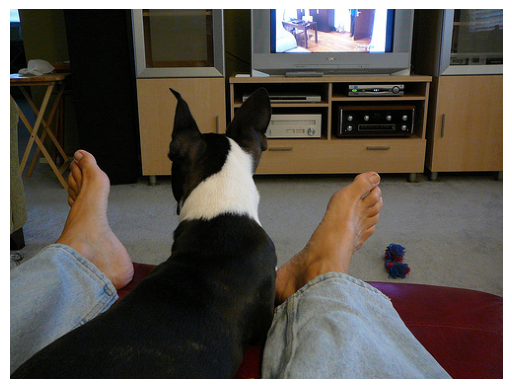

A dog sitting between its masters feet on a footstool watching tv

A dog between the feet of a person looking at a TV.
A dog and a person are watching television together.
A person is sitting with their dog watching tv.
A man relaxing at home, watching television with his dog.


In [13]:
rand_img_ids = np.random.choice(img_ids, size=100, replace=False)
img_id = rand_img_ids[0]

# Example of accessing image captions
img = coco_caps.loadImgs(int(img_id))[0]
url = img["coco_url"]

image = Image.open(BytesIO(requests.get(url).content))
plt.imshow(image)
plt.axis("off")
plt.show()

# There are five natural-language descriptions per image
ann_ids = coco_caps.getAnnIds(imgIds=img_id)
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)

To utilise GPU resources, Kaggle was used to generate images using captions.txt